In [60]:
import pandas as pd
train = pd.read_csv('home-data-for-ml-course/train.csv')
test = pd.read_csv('home-data-for-ml-course/test.csv')

In [61]:
p = train.isnull().sum()/len(train)*100
null_drops = list(p.loc[p>90].index)
mtrain= train.drop(null_drops, axis=1)
mtrain = mtrain.drop("Id",axis=1)

In [62]:
mtrain.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 77, dtype: int64

In [63]:
p2= mtrain.isnull().sum()/len(train)*100
check_features = list(p2.loc[p2>45].index)

In [66]:
check_features

['FireplaceQu', 'Fence', 'SalePrice']

In [107]:
dummyd = mtrain[check_features]
dummyd.FireplaceQu= dummyd.FireplaceQu.fillna('NF')
dummyd.Fence = dummyd.Fence.fillna('NF')

/var/folders/zy/z7lyg4k560j0lf908qw4xb440000gn/T/ipykernel_93692/4254658411.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dummyd.FireplaceQu= dummyd.FireplaceQu.fillna('NF')
/var/folders/zy/z7lyg4k560j0lf908qw4xb440000gn/T/ipykernel_93692/4254658411.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dummyd.Fence = dummyd.Fence.fillna('NF')


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 64.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 32.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 25.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 60.6% of the points cannot be placed; you may want to decrease the size of the markers or use s

<AxesSubplot:xlabel='SalePrice', ylabel='Fence'>

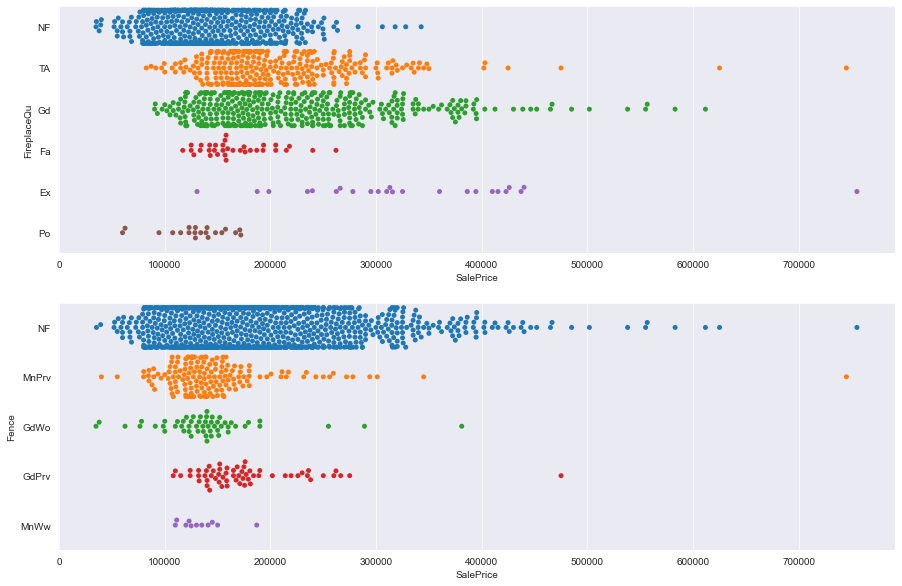

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

fig,axes= plt.subplots(2,1,figsize= (15,10))

sns.swarmplot(data=dummyd,x='SalePrice',y='FireplaceQu',ax=axes[0])
sns.swarmplot(data=dummyd,x='SalePrice',y='Fence',ax=axes[1])

In [109]:
dummyd = dummyd.drop(dummyd[(dummyd['SalePrice']>220000)&(dummyd['Fence']=='GdWo')].index)
dummyd = dummyd.drop(dummyd[(dummyd['SalePrice']>170000)&(dummyd['Fence']=='MnWw')].index)
dummyd = dummyd.drop(dummyd[(dummyd['SalePrice']>310000)&(dummyd['Fence']=='MnPrv')].index)
dummyd = dummyd.drop(dummyd[(dummyd['SalePrice']>470000)&(dummyd['Fence']=='NF')].index)

dummyd = dummyd.drop(dummyd[(dummyd['SalePrice']>370000)&(dummyd['FireplaceQu']=='TA')].index)
dummyd = dummyd.drop(dummyd[(dummyd['SalePrice']>700000)&(dummyd['FireplaceQu']=='Ex')].index)
#dummyd.FireplaceQu.loc[dummyd.FireplaceQu=='Ex'] = 'Gd'

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 50.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 17.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 9.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 46.0% of the points cannot be placed; you may want to decrease the size of the markers or use st

<AxesSubplot:xlabel='SalePrice', ylabel='Fence'>

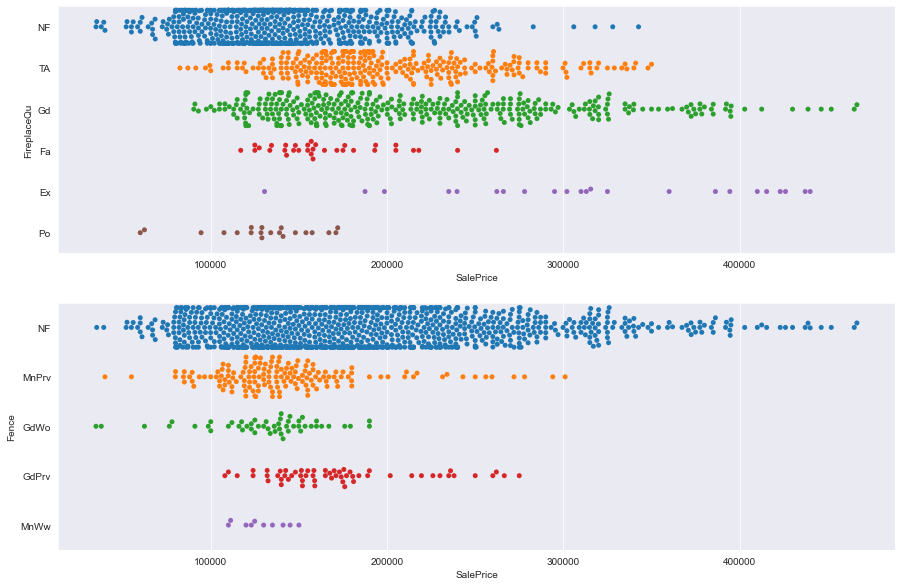

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

fig,axes= plt.subplots(2,1,figsize= (15,10))

sns.swarmplot(data=dummyd,x='SalePrice',y='FireplaceQu',ax=axes[0])
sns.swarmplot(data=dummyd,x='SalePrice',y='Fence',ax=axes[1])

In [111]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_selector

catsel = make_column_selector(dtype_include='object')
enc = OrdinalEncoder()
dummyd[catsel(dummyd)] = enc.fit_transform(dummyd[catsel(dummyd)])

In [73]:
dummyd.corr()['SalePrice']

FireplaceQu   -0.096949
Fence          0.149572
SalePrice      1.000000
Name: SalePrice, dtype: float64

In [85]:
dummyd.corr()['SalePrice']

FireplaceQu   -0.072563
Fence          0.169230
SalePrice      1.000000
Name: SalePrice, dtype: float64

In [112]:
dummyd.corr()['SalePrice']

FireplaceQu   -0.107825
Fence          0.171719
SalePrice      1.000000
Name: SalePrice, dtype: float64